<a href="https://colab.research.google.com/github/basnow28/ITDS440---Statistical-Analysis-for-Data-Science/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
#leemos el fichero IMDB
df=pd.read_csv("/content/drive/MyDrive/EIU Statistical Analysis For Data Science/datasets/matches_cleaned.csv", sep=",")

Mounted at /content/drive


# Import necessary libraries for data exploration

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,attendance,round,date,year,away_yellow_card_count,home_yellow_card_count,home_red_card_count,away_red_card_count,penalty_kicks,home_substitutes_count,away_substitutes_count
0,Spain,England,1,2.1,0,0,0.5,0,75784,Final,2023-08-20,2023,1,1,0,0,False,3,3
1,Sweden,Australia,2,1.8,0,0,0.8,0,49461,Third-place match,2023-08-19,2023,1,2,0,0,False,3,4
2,Australia,England,1,1.4,0,3,1.3,0,75784,Semi-finals,2023-08-16,2023,2,0,0,0,False,3,2
3,Spain,Sweden,2,1.6,0,1,0.9,0,43217,Semi-finals,2023-08-15,2023,0,0,0,0,False,3,3
4,Australia,France,0,1.6,7,0,2.0,6,49461,Quarter-finals,2023-08-12,2023,0,1,0,0,True,3,3


# Total Atendance per year

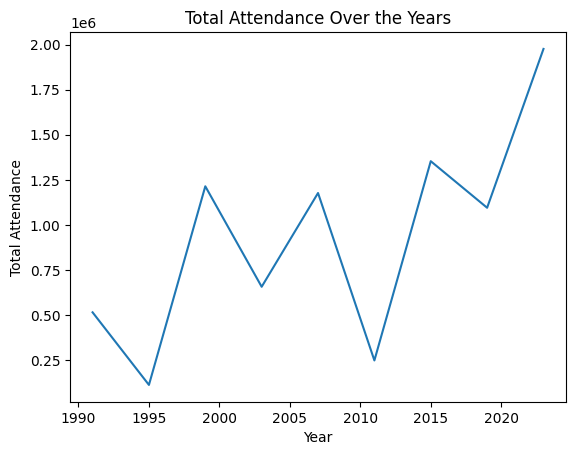

In [ ]:
df.groupby('year')['attendance'].sum().plot(kind='line')
plt.title('Total Attendance Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Attendance')
plt.show()

# Performance per country

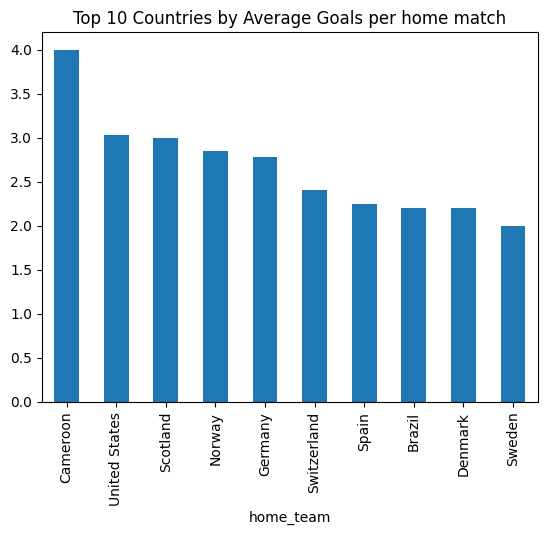

In [ ]:
df.groupby('home_team')['home_score'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Countries by Average Goals per home match')
plt.show()

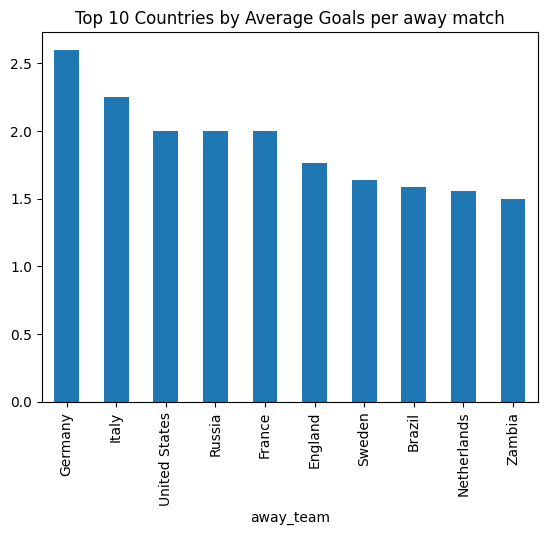

In [ ]:
df.groupby('away_team')['away_score'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Countries by Average Goals per away match')
plt.show()

# Total yellow and red cards per year

In [ ]:
df['total_yellow_cards'] = df['away_yellow_card_count'] + df['home_yellow_card_count']

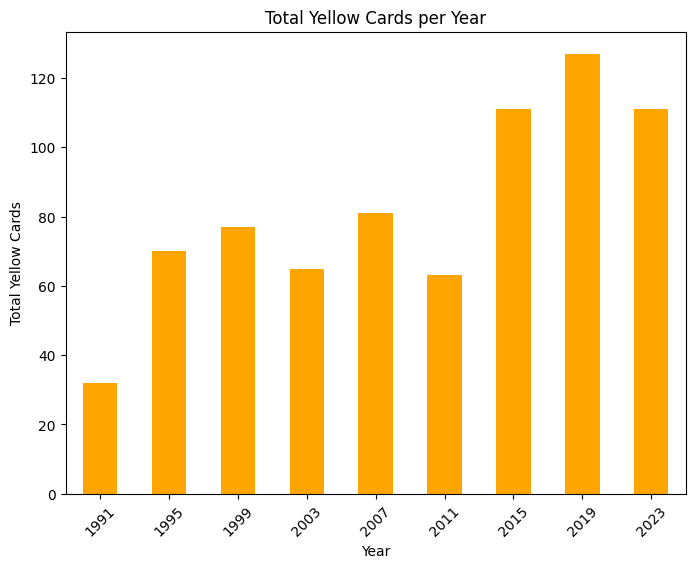

In [ ]:
yellow_cards_per_year = df.groupby('year')['total_yellow_cards'].sum()

plt.figure(figsize=(8, 6))
yellow_cards_per_year.plot(kind='bar', color='orange')
plt.title('Total Yellow Cards per Year')
plt.xlabel('Year')
plt.ylabel('Total Yellow Cards')
plt.xticks(rotation=45)
plt.show()

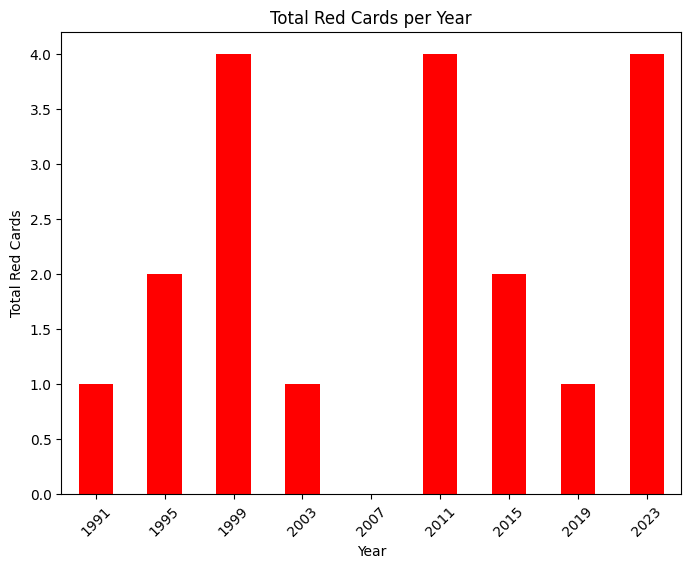

In [ ]:
df['total_red_cards'] = df['away_red_card_count'] + df['home_red_card_count']
red_cards_per_year = df.groupby('year')['total_red_cards'].sum()

plt.figure(figsize=(8, 6))
red_cards_per_year.plot(kind='bar', color='red')
plt.title('Total Red Cards per Year')
plt.xlabel('Year')
plt.ylabel('Total Red Cards')
plt.xticks(rotation=45)
plt.show()

# Final Round total goals

<ipython-input-11-06ca6e859d7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_round_df['total_goals'] = final_round_df['home_score'] + final_round_df['away_score']


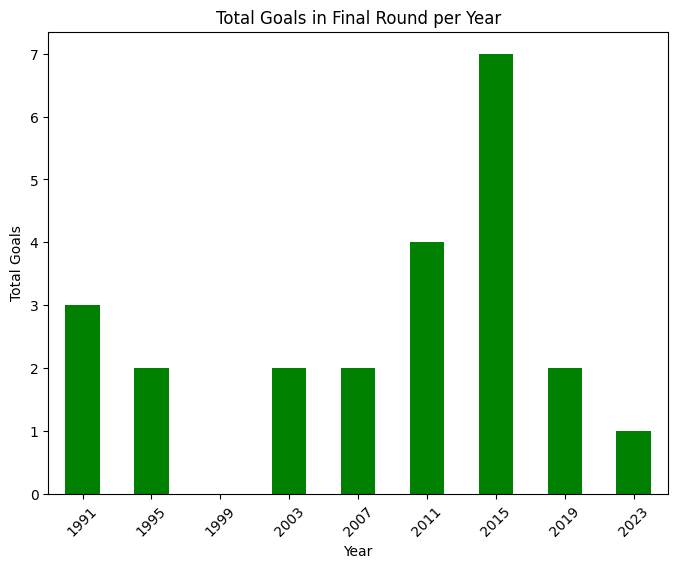

In [ ]:
final_round_df = df[df['round'] == 'Final']

final_round_df['total_goals'] = final_round_df['home_score'] + final_round_df['away_score']
total_goals_final_round = final_round_df.groupby('year')['total_goals'].sum()


plt.figure(figsize=(8, 6))
total_goals_final_round.plot(kind='bar', color='green')
plt.title('Total Goals in Final Round per Year')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()

## Let's analyze year 1999

In [ ]:
final_round_df[(final_round_df['year'] == 1999)]

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,attendance,round,...,away_yellow_card_count,home_yellow_card_count,home_red_card_count,away_red_card_count,penalty_kicks,home_substitutes_count,away_substitutes_count,total_yellow_cards,total_red_cards,total_goals
265,United States,China PR,0,3.88,5,0,0.8,4,90185,Final,...,2,1,0,0,True,3,3,3,0,0


### We can see that United States won with penalty kicks 5:4

# The winners of each year

In [ ]:
final_round_df = df[df['round'] == 'Final']

final_round_df['winner'] = np.where(final_round_df['home_score'] > final_round_df['away_score'],
                                      final_round_df['home_team'],
                                      final_round_df['away_team'])

# Make sure that the 1999 winner is set to united states
final_round_df.loc[(final_round_df['year'] == 1999), 'winner'] = 'United States'

winners_per_year = final_round_df[['year', 'winner']].drop_duplicates()

total_wins = final_round_df['winner'].value_counts().reset_index()
total_wins.columns = ['team', 'total_wins']

print(total_wins)

            team  total_wins
0  United States           5
1          Spain           1
2        Germany           1
3         Sweden           1
4         Norway           1


<ipython-input-13-7ebffb167de1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_round_df['winner'] = np.where(final_round_df['home_score'] > final_round_df['away_score'],


## Pie chart

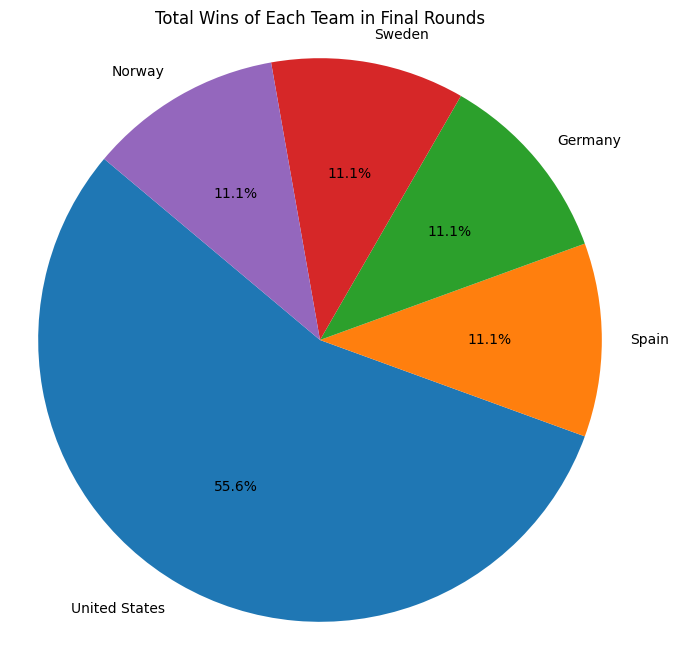

In [ ]:
#Create a pie chart of total wins per team
plt.figure(figsize=(8, 8))
plt.pie(total_wins['total_wins'], labels=total_wins['team'], autopct='%1.1f%%', startangle=140)
plt.title('Total Wins of Each Team in Final Rounds')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Scetter plot

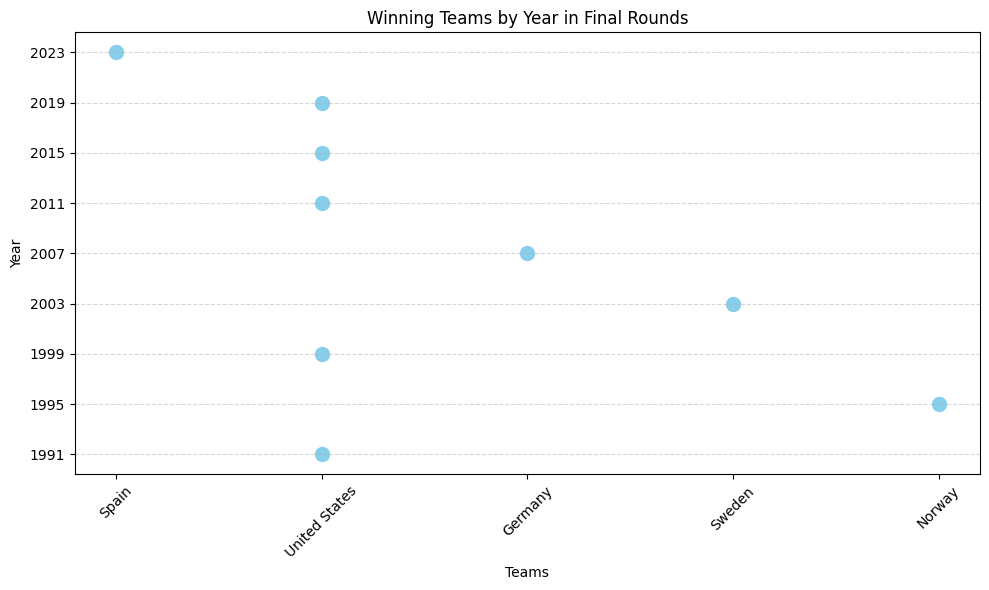

In [ ]:
# Step 3: Extract winners and years
winners_per_year = final_round_df[['year', 'winner']].drop_duplicates()

# Step 4: Create a scatter plot with years on the Y-axis and teams on the X-axis
plt.figure(figsize=(10, 6))

# Create a mapping of team names to numerical values for the X-axis
teams = winners_per_year['winner'].unique()
team_mapping = {team: idx for idx, team in enumerate(teams)}
winners_per_year['team_idx'] = winners_per_year['winner'].map(team_mapping)

# Plotting
plt.scatter(winners_per_year['team_idx'], winners_per_year['year'], s=100, color='skyblue')

# Step 6: Customize the plot
plt.title('Winning Teams by Year in Final Rounds')
plt.xlabel('Teams')
plt.ylabel('Year')

plt.yticks(sorted(winners_per_year['year'].unique()), sorted(winners_per_year['year'].unique()))

# Set X-ticks to show team names
plt.xticks(list(team_mapping.values()), list(team_mapping.keys()), rotation=45)

# Grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Step 7: Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'attendance', 'round', 'date',
       'year', 'away_yellow_card_count', 'home_yellow_card_count',
       'home_red_card_count', 'away_red_card_count', 'penalty_kicks',
       'home_substitutes_count', 'away_substitutes_count',
       'total_yellow_cards', 'total_red_cards'],
      dtype='object')